In [ ]:
## 0. Imports

In [2]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import collections
from sklearn.model_selection import train_test_split
from tqdm.auto import tqdm
from preprocess import train_loader
print(torch.__version__, torch.cuda.is_available())

2.2.1+cu121 True


In [3]:
## 1. EDA (Exploratory Data Analysis): примеры и распределение классов

In [4]:
DATA_DIR = Path("dataset\\dataset")        # внутренняя папка с 24 странами
ignore = {"__MACOSX"}                             
classes = [p for p in DATA_DIR.iterdir() if p.is_dir() and p.name not in ignore]

In [5]:
### 1.1 распределение

Всего классов: 24
{'BEL': 100, 'BGR': 100, 'BLR': 100, 'CAN': 100, 'CHL': 100, 'DEU': 100, 'DOM': 100, 'ESP': 100, 'EST': 100, 'GBR': 100, 'HUN': 100, 'IDN': 100, 'IRL': 100, 'ITA': 100, 'KAZ': 100, 'KGZ': 100, 'MDA': 100, 'MEX': 100, 'NLD': 100, 'POL': 100, 'SVK': 100, 'SWE': 100, 'USA': 100, 'UZB': 100}


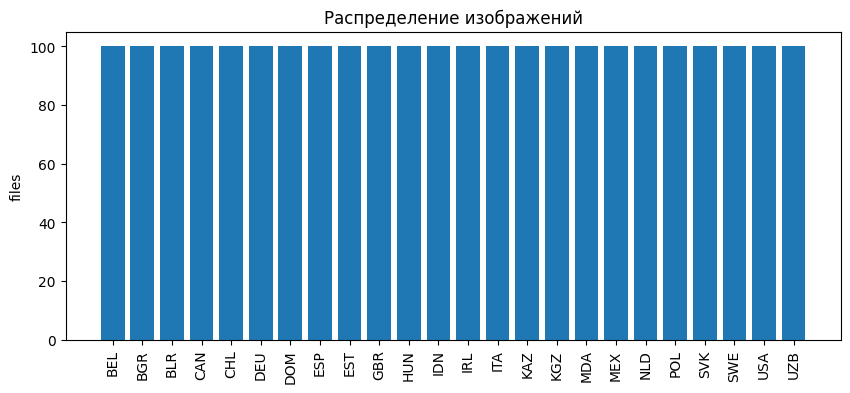

In [6]:
counts = {cls.name: len(list(cls.glob("*.jpg"))) for cls in classes}
print("Всего классов:", len(counts))
print(counts)

# bar-chart
plt.figure(figsize=(10,4))
plt.bar(counts.keys(), counts.values())
plt.xticks(rotation=90); plt.ylabel("files"); plt.title("Распределение изображений")
plt.show()

In [7]:
### 1.2 размеры изображений

In [8]:
sizes = collections.defaultdict(list)
for cls in tqdm(classes):
    for f in cls.glob("*.jpg"):
        img = cv2.imread(str(f))
        if img is None: continue
        h, w = img.shape[:2]
        sizes[cls.name].append((w, h))

100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:56<00:00,  2.36s/it]


In [9]:
for c, sz in sizes.items():
    print(c, max(sz), min(sz), np.array(sz).mean(0))
    break

BEL (1933, 1364) (1933, 1364) [1933. 1364.]


In [10]:
flag = 0
for c, sz in sizes.items():
    if min(sz) != max(sz):
        flag = 1
        print(f"{c}: min {min(sz)}  max {max(sz)}  mean {np.array(sz).mean(0)}")
if not flag:
    print('done')

done


In [11]:
# проверяем размерность картинок
for c, sz in list(sizes.items())[:5]:
    if min(sz) == max(sz):
        print(f"{c}: min {min(sz)}  max {max(sz)}  mean {np.array(sz).mean(0)}")

BEL: min (1933, 1364)  max (1933, 1364)  mean [1933. 1364.]
BGR: min (1927, 1347)  max (1927, 1347)  mean [1927. 1347.]
BLR: min (2058, 1436)  max (2058, 1436)  mean [2058. 1436.]
CAN: min (1902, 1392)  max (1902, 1392)  mean [1902. 1392.]
CHL: min (1978, 1405)  max (1978, 1405)  mean [1978. 1405.]


In [12]:
# У каждой страны своя размерность фото, но внутри страны размерность не меняется, это хорошо

In [13]:
### примеры из первых 6 стран

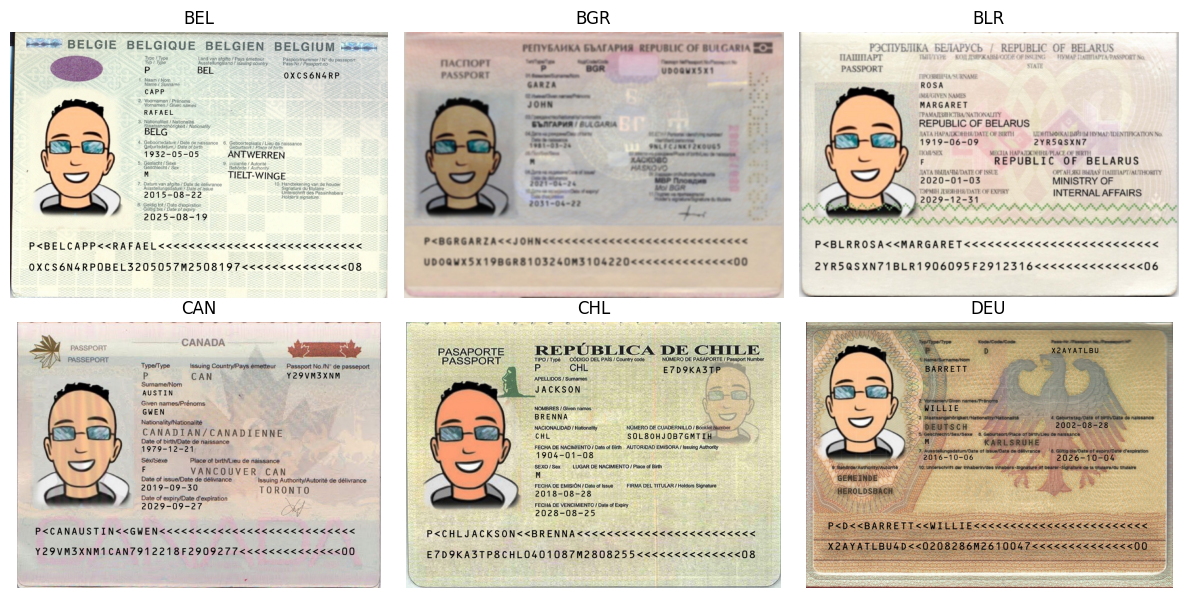

In [14]:
plt.figure(figsize=(12,6))
for i, cls in enumerate(classes[:6]):
    img_path = next(cls.glob("*.jpg"))
    img = cv2.cvtColor(cv2.imread(str(img_path)), cv2.COLOR_BGR2RGB)
    plt.subplot(2,3,i+1); plt.imshow(img); plt.title(cls.name); plt.axis("off")
plt.tight_layout(); plt.show()

In [15]:
# Классы распределены равномерно, есть просадка качества на отдельных фото

Batch: torch.Size([32, 3, 224, 224]) [13, 0, 6, 4, 0, 21, 10, 10, 8, 9, 8, 13, 2, 23, 16, 6, 4, 10, 9, 12, 5, 9, 4, 23, 6, 16, 10, 9, 1, 10, 2, 13]


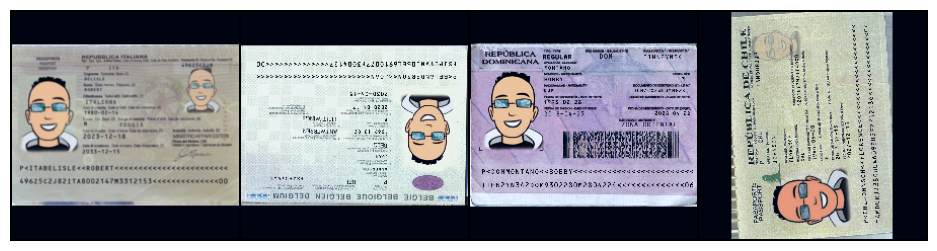

In [16]:
from torchvision.utils import make_grid  # склейка набора картинок в одну большую картинку

# один батч
images, labels = next(iter(train_loader))
print("Batch:", images.shape, labels.tolist())

# 4 картинки
grid = make_grid(images[:4], nrow=4, normalize=True)
plt.figure(figsize=(12,3))
plt.imshow(grid.permute(1,2,0))
plt.axis("off")
plt.show()


In [4]:
# можно попробовать кроп до фото, чтобы модель не принимала во внимание фото вообще, т.е. обучаем с фото и после без